# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2020/21)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 01.12.2020


### Erster Vorlesungsteil:  
#### Die 19 Klassen der evolutionären symmetrischen ($2\times3$)-Spiele 


## Einführung

In diesem Unterkapitel werden die evolutionären symmetrischen ($2\times 3$)-Spiele analysiert. Symmetrische ($2\times m$)-Spiele werden durch die folgende Differentialgleichung beschrieben:

$$
\begin{equation}
\frac{d \vec{x}}{dt} = \hat{\bf x} \left( \hat{\bf {\cal \$}}\,\vec{x} \right) -  \left(\left(\hat{\bf {\cal \$}}\,\vec{x} \right)^T \vec{x} \right) \vec{x}
\end{equation}
$$
Aufgrund der Symmetrie der Auszahlungsmatrix $\hat{\bf {\cal \$}} = \hat{\bf {\cal \$}}^A = \left( \hat{\bf {\cal \$}}^B \right)^{\!T}$ kann die zeitliche Entwicklung solcher Spiele durch nur einen Populationsvektor ($\vec{x}(t)=(x_1(t), x_2(t), ..., x_{m}(t))$ beschrieben werden. 

Wir beschränken uns im Folgenden auf den Fall $m=3$ und setzen die Auszahlungsmatrix wie folgt an:

$$
\begin{equation}
\hat{\bf {\cal \$}} =  
\left(
\begin{array}{rrr} 
\$_{11} & \$_{12} & \$_{13}\\ 
\$_{21} & \$_{22} & \$_{23}\\ 
\$_{31} & \$_{32} & \$_{33}\\ 
\end{array}
\right)
\end{equation}
$$

Aufgrund der Normalisierungsbedingung des Populationsvektors kann man den Anteil der Population, die die Strategie drei spielen durch die anderen beiden Anteile ausdrücken: $x_3(t)=1 - x_1(t) - x_2(t)$.

Wir betrachten uns zunächst das entstehende System von Differentialgleichungen.

In [1]:
from sympy import *
init_printing()

Definition der Auszahlungsmatrix und des Populationsvektors:

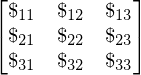

In [2]:
D11,D12,D13,D21,D22,D23,D31,D32,D33 = symbols('\$_{11},\$_{12},\$_{13},\$_{21},\$_{22},\$_{23},\$_{31},\$_{32},\$_{33}')
D=Matrix([[D11,D12,D13],[D21,D22,D23],[D31,D32,D33]])
D

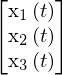

In [3]:
t = symbols('t')
x1 = Function('x_1')(t)
x2 = Function('x_2')(t)
x3 = Function('x_3')(t)
x=Matrix([x1,x2,x3])
x

Definition des Systems von Differentialgleichungen:

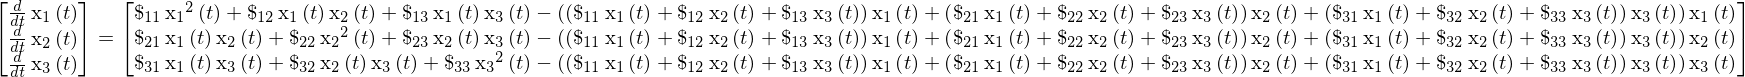

In [4]:
DiffPop=Eq(x.diff(t),diag(x1,x2,x3)*D*x-(transpose(D*x)*x)[0]*x)
DiffPop

Einarbeitung der Normalisierungsbedingung des Populationsvektors:

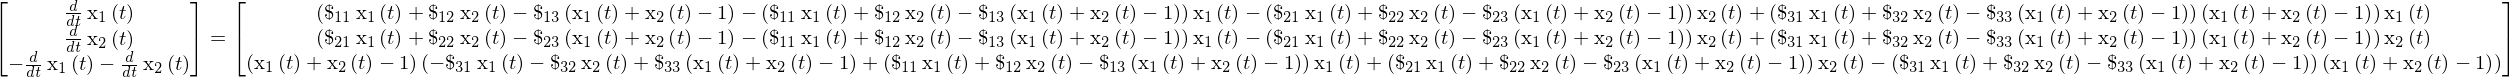

In [5]:
DiffPop1=Eq(x.subs([(x3,1-x1-x2)]).diff(t),simplify(DiffPop.rhs.subs([(x3,1-x1-x2)])))
DiffPop1

Die dritte dieser Gleichungen liefert keine neue Information, so dass wir es hier mit einem System von zwei gekoppelten, nichtlinearen Differentialgleichungen erster Ordnung zu tun haben. Um dieses System von Differentialgleichungen numerisch lösen zu können, müssen wir die Parameter der Auszahlungsmatrix festlegen. Wir wählen z.B.:

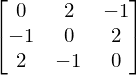

In [6]:
#1.Zeeman Klasse
D11_1=0
D12_1=2
D13_1=-1
D21_1=-1
D22_1=0
D23_1=2
D31_1=2
D32_1=-1
D33_1=0
D.subs([(D11,D11_1),(D12,D12_1),(D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),(D31,D31_1),(D32,D32_1),(D33,D33_1)])

Die erste Differentialgleichung hat nun das folgende explizite Aussehen:

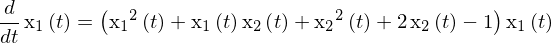

In [7]:
DiffPop2a=Eq(x[0].diff(t),simplify(DiffPop1.rhs[0].subs([(D11,D11_1),(D12,D12_1),
            (D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),
            (D31,D31_1),(D32,D32_1),(D33,D33_1)])))
DiffPop2b=Eq(x[1].diff(t),simplify(DiffPop1.rhs[1].subs([(D11,D11_1),(D12,D12_1),
            (D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),
            (D31,D31_1),(D32,D32_1),(D33,D33_1)])))
DiffPop2a

Die zweite Differentialgleichung lautet:

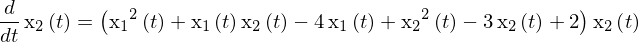

In [8]:
DiffPop2b

Zusätzlich benutzen wir die Funktion lambdify() um die numerischen Werte der Differentialgleichungen zu erhalten (siehe https://docs.sympy.org/latest/modules/utilities/lambdify.html ):

In [9]:
DiffPop3a=lambdify([t,(x1,x2)], DiffPop2a.rhs)
DiffPop3b=lambdify([t,(x1,x2)], DiffPop2b.rhs)

Wir definieren das Differentialgleichungssystem als eine Funktion:

In [10]:
def DGLsys(vx,t):
    x1, x2 = vx
    dx1dt = DiffPop3a(t,(x1,x2))
    dx2dt = DiffPop3b(t,(x1,x2))
    return np.array([dx1dt,dx2dt])

Zum numerischen Lösen des Systems der Differentialgleichungen lesen wir die folgenden Python Module ein:

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
from scipy import integrate
params = {
    'figure.figsize'    : [8,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

Wir legen die Anfang-Strategienwahl der Population fest (hier $x_1(0)=0.06$, $x_2(0)=0.9$ $\,\,\rightarrow \, x_3(0)=0.04$) und lösen das DGL-System numerisch.

In [12]:
tval = np.linspace(0, 15, 1001)
x1_0 = 0.06
x2_0 = 0.9
initialval = np.array([x1_0,x2_0])
Loes = integrate.odeint(DGLsys, initialval, tval)

Die numerischen Lösungen der zeitlichen Entwicklung der Strategienwahl stellen wir grafisch dar:

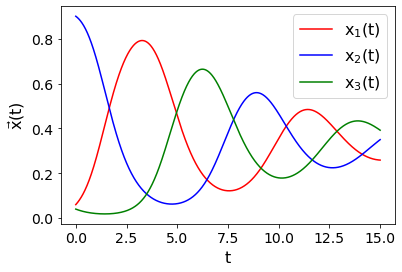

In [13]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \vec{x}(t)$")
plt.plot(tval, Loes[:, 0],c="red", label=r"$\rm x_1(t)$");
plt.plot(tval, Loes[:, 1],c="blue", label=r"$\rm x_2(t)$");
plt.plot(tval, 1-Loes[:, 0]-Loes[:, 1],c="green", label=r"$\rm x_3(t)$");
plt.legend(loc='upper right',fontsize=16);

Die zeitliche Entwicklung der Strategiewahl der Population kann man sich auch in einem baryzentrischen Dreiecks-Koordinatensystem veranschaulichen, wobei der x-Achsen Wert durch $x:=x_2+x_3/2$ und der y-Achsen Wert durch $y:=x_3$ definiert ist.

Zunächst schreiben wir das System der Differentialgleichungen in die neuen Koordinaten um:

In [14]:
x = Function('x')(t)
y = Function('y')(t)
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.rhs.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.rhs.subs([(x2,x-y/2),(x1,1-x-y/2)]))

In [15]:
def DGLsysbary(vxy,t):
    x, y = vxy
    dxdt = DiffPop4b(t,(x,y))-(DiffPop4a(t,(x,y))+DiffPop4b(t,(x,y)))/2.0
    dydt = -DiffPop4a(t,(x,y))-DiffPop4b(t,(x,y))
    return np.array([dxdt,dydt])

... und berechnen dann die numerische Lösung für die schon oben gewählten Anfangsbedingungen ($x_1(0)=0.06$, $x_2(0)=0.9$, $x_3(0)=0.04$) $\,\rightarrow \,$ $x(0)=0.9 + 0.04/2 = 0.92$ und $y(0)=0.04$.

In [16]:
tval = np.linspace(0, 25, 1001)
x_0 = 0.92
y_0 = 0.04
initialval = np.array([x_0,y_0])
Loesbary = integrate.odeint(DGLsysbary, initialval, tval)

In [17]:
import matplotlib.colors as colors
params = {
    'figure.figsize'    : [8,6],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

Ähnlich wie bei den Bi-Matrix Spielen veranschaulichen wir zusätzlich zur numerischen Lösung, im Hintergrund der Abbildung, das zugrundeliegende Feldlinienbild der Populationsdynamik.

In [18]:
Y, X = np.mgrid[0:1:100j, 0:1:100j]
gX = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed = np.sqrt(gX**2 + gY**2)
colorspeed = speed

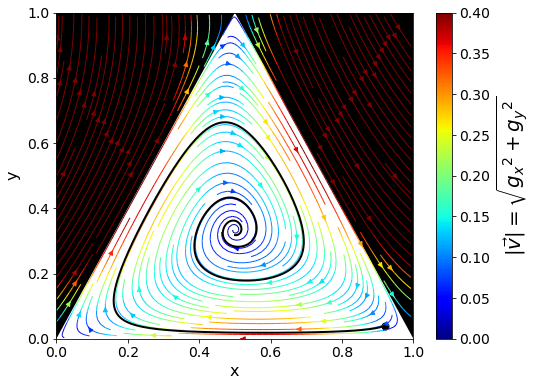

In [19]:
plt.cla()
plt.xlabel(r"$\rm x$")
plt.ylabel(r"$\rm y$")
figure=plt.streamplot(X, Y, gX, gY, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed, cmap=plt.cm.jet)
plt.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
plt.fill([1,0.5,1], [0,1,1], facecolor='black')
plt.scatter(x_0, y_0, s=50, marker='o', c="black")
plt.plot(Loesbary[:, 0], Loesbary[:, 1],c="black",linewidth=2)
cbar=plt.colorbar(figure.lines, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=20)
plt.xlim(0, 1)
plt.ylim(0, 1);

Die Richtungspfeile des Feldliniendiagramms beschreiben die Richtung der zeitlichen Entwicklung der Strategiewahl im baryzentrischen Dreiecks-Koordinatensystem. Die Ecken des Dreiecks stellen die reinen Strategien dar; z.B. repräsentiert die untere Linke Ecke bei (x=0,y=0) die reine Strategie $x_1$, bei der jeder Spieler der Population die Strategie $s_1$ wählt. Die Farbe der Feldlinien ist durch den Betrag der Geschwindigkeit der Änderung der Strategiewahl der Population bestimmt ($\left| \vec{v}(x,y) \right|$).

Sowohl die Feldlinien, als auch die spezielle Lösung der Differentialgleichung bei festgelegter Anfangsbedingung (schwarze Kurve) zeigen, dass sich bei diesem Spiel die Population in schneckenförmiger Struktur zum Zentrum bewegt. Unabhängig von der Wahl der Anfangsbedingung strebt die Strategiewahl der Population zum gemischten Nash-Gleichgewicht des Spiels, welche die einzige evolutionär stabile Strategie darstellt.

Wir veranschaulichen uns wieder die zeitliche Entwicklung in einer Animation:

In [20]:
import matplotlib.animation as animation
from IPython.display import HTML

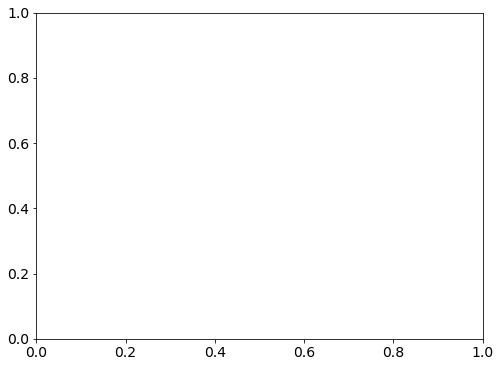

In [22]:
fig = plt.figure()
ax = fig.gca()

def init():
    ax.streamplot(X, Y, gX, gY, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed, cmap=plt.cm.jet)
    ax.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax.scatter(x_0, y_0, s=70, marker='o', c="black")
    cbar=plt.colorbar(figure.lines, ax=ax, aspect=20)
    cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=20)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

def animate(i):
    ax.scatter(Loesbary[20*i, 0], Loesbary[20*i, 1], s=25, marker='o', c="black")
    ax.plot(Loesbary[:20*i, 0], Loesbary[:20*i, 1],c="black",linewidth=2)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=400)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Die oben dargestellt zeitliche Entwicklung eines (2x3)-Spiels stellt nur ein Beispiel dar. E. C. Zeeman konnte in seinem im Jahre 1980 ver&ouml;ffentlichten Artikel zeigen, dass man evolution&auml;re, symmetrische (2x3)-Spiele in 19 Klassen einteilen kann. Es gibt Spielklassen, die besitzen lediglich eine evolution&auml;r stabile Strategie (wie die oben dargestellte) und Klassen die sogar drei evolution&auml;r stabile Strategien besitzen. (siehe <A href="https://lms.ac.uk/sites/lms.ac.uk/files/1980%20Population%20dynamics%20from%20game%20theory%20(preprint).pdf">E.C. Zeeman, POPULATION DYNAMICS FROM GAME THEORY, In: Global Theory of Dynamical Systems, Springer 1980</A>). Im folgenden wollen wir die weiteren Spielklassen darstellen.

Definition der 19 Auszahlungsmatrizen der Spielklassen:

In [23]:
D11_1,D12_1,D13_1,D21_1,D22_1,D23_1,D31_1,D32_1,D33_1=0,2,-1,-1,0,2,2,-1,0
D11_2,D12_2,D13_2,D21_2,D22_2,D23_2,D31_2,D32_2,D33_2=0,3,-1,1,0,1,3,-1,0
D11_3,D12_3,D13_3,D21_3,D22_3,D23_3,D31_3,D32_3,D33_3=0,1,1,-1,0,3,1,1,0
D11_4,D12_4,D13_4,D21_4,D22_4,D23_4,D31_4,D32_4,D33_4=0,6,-4,-3,0,5,-1,3,0
D11_5,D12_5,D13_5,D21_5,D22_5,D23_5,D31_5,D32_5,D33_5=0,1,1,1,0,1,1,1,0
D11_6,D12_6,D13_6,D21_6,D22_6,D23_6,D31_6,D32_6,D33_6=0,3,-1,3,0,-1,1,1,0
D11_7,D12_7,D13_7,D21_7,D22_7,D23_7,D31_7,D32_7,D33_7=0,1,3,-1,0,5,1,3,0
D11_8,D12_8,D13_8,D21_8,D22_8,D23_8,D31_8,D32_8,D33_8=0,1,-1,-1,0,1,-1,1,0
D11_9,D12_9,D13_9,D21_9,D22_9,D23_9,D31_9,D32_9,D33_9=0,-1,3,-1,0,3,1,1,0
D11_10,D12_10,D13_10,D21_10,D22_10,D23_10,D31_10,D32_10,D33_10=0,1,1,-1,0,1,-1,-1,0
D11_11,D12_11,D13_11,D21_11,D22_11,D23_11,D31_11,D32_11,D33_11=0,1,1,1,0,1,-1,-1,0
D11_12,D12_12,D13_12,D21_12,D22_12,D23_12,D31_12,D32_12,D33_12=0,1,-1,1,0,1,1,-1,0
D11_13,D12_13,D13_13,D21_13,D22_13,D23_13,D31_13,D32_13,D33_13=0,-1,-1,1,0,1,-1,1,0
D11_14,D12_14,D13_14,D21_14,D22_14,D23_14,D31_14,D32_14,D33_14=0,-1,1,-1,0,1,-1,-1,0
D11_15,D12_15,D13_15,D21_15,D22_15,D23_15,D31_15,D32_15,D33_15=0,-1,-1,1,0,-1,-1,-1,0
D11_16,D12_16,D13_16,D21_16,D22_16,D23_16,D31_16,D32_16,D33_16=0,-1,-1,1,0,-3,-1,-3,0
D11_17,D12_17,D13_17,D21_17,D22_17,D23_17,D31_17,D32_17,D33_17=0,1,-1,-3,0,1,-1,1,0
D11_18,D12_18,D13_18,D21_18,D22_18,D23_18,D31_18,D32_18,D33_18=0,1,-3,1,0,-1,-3,-1,0
D11_19,D12_19,D13_19,D21_19,D22_19,D23_19,D31_19,D32_19,D33_19=0,-3,-1,-3,0,-1,-1,-1,0

In [24]:
import matplotlib.gridspec as gridspec
params = {
    'figure.figsize'    : [14,4],
#    'text.usetex'       : True,
    'axes.titlesize' : 10,
    'axes.labelsize' : 12,  
    'xtick.labelsize' : 10 ,
    'ytick.labelsize' : 10 
}
matplotlib.rcParams.update(params) 

Es folgen die Animationen der weiteren Spielklassen:

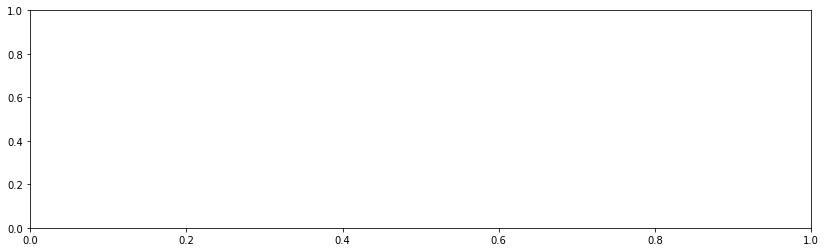

In [25]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_2),(D12,D12_2),
            (D13,D13_2),(D21,D21_2),(D22,D22_2),(D23,D23_2),
            (D31,D31_2),(D32,D32_2),(D33,D33_2)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_2),(D12,D12_2),
            (D13,D13_2),(D21,D21_2),(D22,D22_2),(D23,D23_2),
            (D31,D31_2),(D32,D32_2),(D33,D33_2)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

tval = np.linspace(0, 25, 1001)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.5
y_0c = 0.85
x_0d = 0.3
y_0d = 0.5
initialvala = np.array([x_0a,y_0a])
initialvalb = np.array([x_0b,y_0b])
initialvalc = np.array([x_0c,y_0c])
initialvald = np.array([x_0d,y_0d])
Loesbary1a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary1b = integrate.odeint(DGLsysbary, initialvalb, tval)
gX1 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_3),(D12,D12_3),
            (D13,D13_3),(D21,D21_3),(D22,D22_3),(D23,D23_3),
            (D31,D31_3),(D32,D32_3),(D33,D33_3)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_3),(D12,D12_3),
            (D13,D13_3),(D21,D21_3),(D22,D22_3),(D23,D23_3),
            (D31,D31_3),(D32,D32_3),(D33,D33_3)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary2b = integrate.odeint(DGLsysbary, initialvalb, tval)
Loesbary2c = integrate.odeint(DGLsysbary, initialvalc, tval)
gX2 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_4),(D12,D12_4),
            (D13,D13_4),(D21,D21_4),(D22,D22_4),(D23,D23_4),
            (D31,D31_4),(D32,D32_4),(D33,D33_4)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_4),(D12,D12_4),
            (D13,D13_4),(D21,D21_4),(D22,D22_4),(D23,D23_4),
            (D31,D31_4),(D32,D32_4),(D33,D33_4)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary3d = integrate.odeint(DGLsysbary, initialvald, tval)
gX3 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

def init():
    figure1=ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
    ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax1.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    figure2=ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
    ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax2.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    figure3=ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
    ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax3.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax3.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    cbar=plt.colorbar(figure1.lines,ax=ax3, aspect=20)
    cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    return fig,

def animate(i):
    ax1.scatter(Loesbary1a[20*i, 0], Loesbary1a[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a[:20*i, 0], Loesbary1a[:20*i, 1],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1b[20*i, 0], Loesbary1b[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1b[:20*i, 0], Loesbary1b[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2a[20*i, 0], Loesbary2a[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2a[:20*i, 0], Loesbary2a[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b[20*i, 0], Loesbary2b[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b[:20*i, 0], Loesbary2b[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c[20*i, 0], Loesbary2c[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c[:20*i, 0], Loesbary2c[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3a[20*i, 0], Loesbary3a[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3a[:20*i, 0], Loesbary3a[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3d[20*i, 0], Loesbary3d[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3d[:20*i, 0], Loesbary3d[:20*i, 1],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

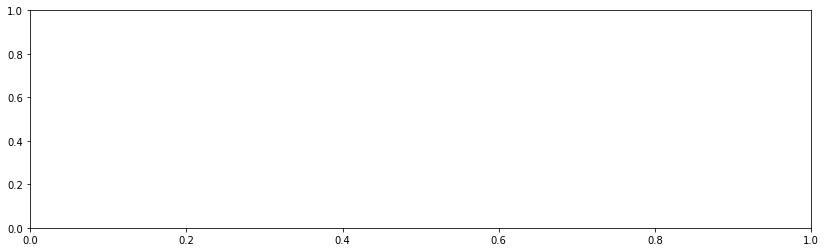

In [26]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_5),(D12,D12_5),
            (D13,D13_5),(D21,D21_5),(D22,D22_5),(D23,D23_5),
            (D31,D31_5),(D32,D32_5),(D33,D33_5)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_5),(D12,D12_5),
            (D13,D13_5),(D21,D21_5),(D22,D22_5),(D23,D23_5),
            (D31,D31_5),(D32,D32_5),(D33,D33_5)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

tval = np.linspace(0, 25, 1001)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.5
y_0c = 0.85
x_0d = 0.3
y_0d = 0.5
initialvala = np.array([x_0a,y_0a])
initialvalb = np.array([x_0b,y_0b])
initialvalc = np.array([x_0c,y_0c])
initialvald = np.array([x_0d,y_0d])
Loesbary1a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary1b = integrate.odeint(DGLsysbary, initialvalb, tval)
gX1 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_6),(D12,D12_6),
            (D13,D13_6),(D21,D21_6),(D22,D22_6),(D23,D23_6),
            (D31,D31_6),(D32,D32_6),(D33,D33_6)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_6),(D12,D12_6),
            (D13,D13_6),(D21,D21_6),(D22,D22_6),(D23,D23_6),
            (D31,D31_6),(D32,D32_6),(D33,D33_6)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary2b = integrate.odeint(DGLsysbary, initialvalb, tval)
Loesbary2d = integrate.odeint(DGLsysbary, initialvald, tval)
gX2 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_7),(D12,D12_7),
            (D13,D13_7),(D21,D21_7),(D22,D22_7),(D23,D23_7),
            (D31,D31_7),(D32,D32_7),(D33,D33_7)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_7),(D12,D12_7),
            (D13,D13_7),(D21,D21_7),(D22,D22_7),(D23,D23_7),
            (D31,D31_7),(D32,D32_7),(D33,D33_7)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary3d = integrate.odeint(DGLsysbary, initialvald, tval)
gX3 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

def init():
    figure1=ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
    ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax1.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    figure2=ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
    ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax2.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure3=ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
    ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax3.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax3.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    cbar=plt.colorbar(figure1.lines,ax=ax3, aspect=20)
    cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    return fig,

def animate(i):
    ax1.scatter(Loesbary1a[20*i, 0], Loesbary1a[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a[:20*i, 0], Loesbary1a[:20*i, 1],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1b[20*i, 0], Loesbary1b[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1b[:20*i, 0], Loesbary1b[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2a[20*i, 0], Loesbary2a[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2a[:20*i, 0], Loesbary2a[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b[20*i, 0], Loesbary2b[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b[:20*i, 0], Loesbary2b[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d[20*i, 0], Loesbary2d[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d[:20*i, 0], Loesbary2d[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3a[20*i, 0], Loesbary3a[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3a[:20*i, 0], Loesbary3a[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3d[20*i, 0], Loesbary3d[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3d[:20*i, 0], Loesbary3d[:20*i, 1],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

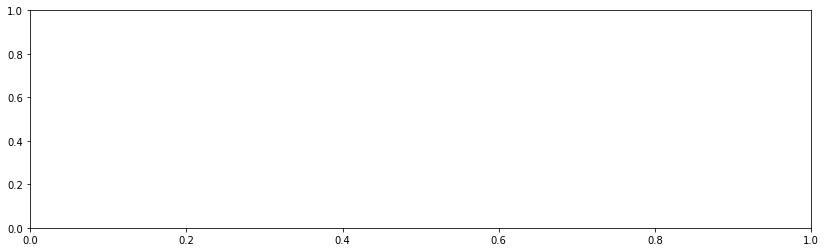

In [27]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_8),(D12,D12_8),
            (D13,D13_8),(D21,D21_8),(D22,D22_8),(D23,D23_8),
            (D31,D31_8),(D32,D32_8),(D33,D33_8)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_8),(D12,D12_8),
            (D13,D13_8),(D21,D21_8),(D22,D22_8),(D23,D23_8),
            (D31,D31_8),(D32,D32_8),(D33,D33_8)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

tval = np.linspace(0, 25, 1001)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.505
y_0c = 0.85
x_0d = 0.3
y_0d = 0.5
initialvala = np.array([x_0a,y_0a])
initialvalb = np.array([x_0b,y_0b])
initialvalc = np.array([x_0c,y_0c])
initialvald = np.array([x_0d,y_0d])
Loesbary1a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary1d = integrate.odeint(DGLsysbary, initialvald, tval)
gX1 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_9),(D12,D12_9),
            (D13,D13_9),(D21,D21_9),(D22,D22_9),(D23,D23_9),
            (D31,D31_9),(D32,D32_9),(D33,D33_9)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_9),(D12,D12_9),
            (D13,D13_9),(D21,D21_9),(D22,D22_9),(D23,D23_9),
            (D31,D31_9),(D32,D32_9),(D33,D33_9)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary2b = integrate.odeint(DGLsysbary, initialvalb, tval)
Loesbary2d = integrate.odeint(DGLsysbary, initialvald, tval)
gX2 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_10),(D12,D12_10),
            (D13,D13_10),(D21,D21_10),(D22,D22_10),(D23,D23_10),
            (D31,D31_10),(D32,D32_10),(D33,D33_10)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_10),(D12,D12_10),
            (D13,D13_10),(D21,D21_10),(D22,D22_10),(D23,D23_10),
            (D31,D31_10),(D32,D32_10),(D33,D33_10)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary3c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary3d = integrate.odeint(DGLsysbary, initialvald, tval)
gX3 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

def init():
    figure1=ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
    ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax1.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure2=ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
    ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure3=ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
    ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax3.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax3.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax3.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    cbar=plt.colorbar(figure1.lines,ax=ax3, aspect=20)
    cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    return fig,

def animate(i):
    ax1.scatter(Loesbary1a[20*i, 0], Loesbary1a[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a[:20*i, 0], Loesbary1a[:20*i, 1],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1d[20*i, 0], Loesbary1d[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1d[:20*i, 0], Loesbary1d[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c[20*i, 0], Loesbary2c[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c[:20*i, 0], Loesbary2c[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b[20*i, 0], Loesbary2b[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b[:20*i, 0], Loesbary2b[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d[20*i, 0], Loesbary2d[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d[:20*i, 0], Loesbary2d[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3a[20*i, 0], Loesbary3a[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3a[:20*i, 0], Loesbary3a[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3c[20*i, 0], Loesbary3c[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3c[:20*i, 0], Loesbary3c[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3d[20*i, 0], Loesbary3d[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3d[:20*i, 0], Loesbary3d[:20*i, 1],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

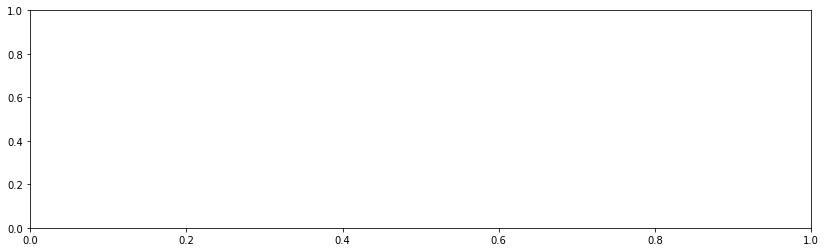

In [28]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_11),(D12,D12_11),
            (D13,D13_11),(D21,D21_11),(D22,D22_11),(D23,D23_11),
            (D31,D31_11),(D32,D32_11),(D33,D33_11)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_11),(D12,D12_11),
            (D13,D13_11),(D21,D21_11),(D22,D22_11),(D23,D23_11),
            (D31,D31_11),(D32,D32_11),(D33,D33_11)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

tval = np.linspace(0, 25, 1001)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.505
y_0c = 0.85
x_0d = 0.3
y_0d = 0.5
initialvala = np.array([x_0a,y_0a])
initialvalb = np.array([x_0b,y_0b])
initialvalc = np.array([x_0c,y_0c])
initialvald = np.array([x_0d,y_0d])
Loesbary1a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary1d = integrate.odeint(DGLsysbary, initialvald, tval)
gX1 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_12),(D12,D12_12),
            (D13,D13_12),(D21,D21_12),(D22,D22_12),(D23,D23_12),
            (D31,D31_12),(D32,D32_12),(D33,D33_12)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_12),(D12,D12_12),
            (D13,D13_12),(D21,D21_12),(D22,D22_12),(D23,D23_12),
            (D31,D31_12),(D32,D32_12),(D33,D33_12)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary2b = integrate.odeint(DGLsysbary, initialvalb, tval)
Loesbary2d = integrate.odeint(DGLsysbary, initialvald, tval)
gX2 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_13),(D12,D12_13),
            (D13,D13_13),(D21,D21_13),(D22,D22_13),(D23,D23_13),
            (D31,D31_13),(D32,D32_13),(D33,D33_13)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_13),(D12,D12_13),
            (D13,D13_13),(D21,D21_13),(D22,D22_13),(D23,D23_13),
            (D31,D31_13),(D32,D32_13),(D33,D33_13)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3b = integrate.odeint(DGLsysbary, initialvalb, tval)
Loesbary3c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary3d = integrate.odeint(DGLsysbary, initialvald, tval)
gX3 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

def init():
    figure1=ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
    ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax1.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure2=ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
    ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure3=ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
    ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax3.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    ax3.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax3.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    cbar=plt.colorbar(figure1.lines,ax=ax3, aspect=20)
    cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    return fig,

def animate(i):
    ax1.scatter(Loesbary1a[20*i, 0], Loesbary1a[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a[:20*i, 0], Loesbary1a[:20*i, 1],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1d[20*i, 0], Loesbary1d[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1d[:20*i, 0], Loesbary1d[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c[20*i, 0], Loesbary2c[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c[:20*i, 0], Loesbary2c[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b[20*i, 0], Loesbary2b[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b[:20*i, 0], Loesbary2b[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d[20*i, 0], Loesbary2d[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d[:20*i, 0], Loesbary2d[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3b[20*i, 0], Loesbary3b[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3b[:20*i, 0], Loesbary3b[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3c[20*i, 0], Loesbary3c[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3c[:20*i, 0], Loesbary3c[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3d[20*i, 0], Loesbary3d[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3d[:20*i, 0], Loesbary3d[:20*i, 1],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

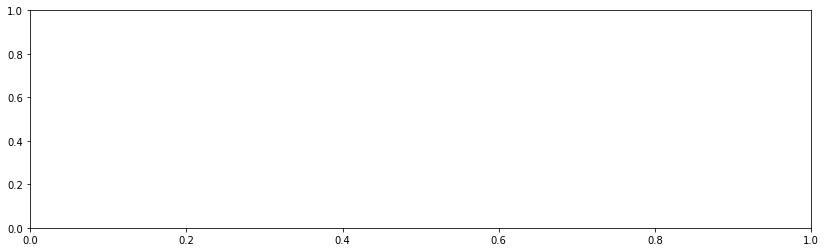

In [29]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_14),(D12,D12_14),
            (D13,D13_14),(D21,D21_14),(D22,D22_14),(D23,D23_14),
            (D31,D31_14),(D32,D32_14),(D33,D33_14)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_14),(D12,D12_14),
            (D13,D13_14),(D21,D21_14),(D22,D22_14),(D23,D23_14),
            (D31,D31_14),(D32,D32_14),(D33,D33_14)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

tval = np.linspace(0, 25, 1001)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.505
y_0c = 0.85
x_0d = 0.3
y_0d = 0.49
x_0e = 0.7
y_0e = 0.4999
initialvala = np.array([x_0a,y_0a])
initialvalb = np.array([x_0b,y_0b])
initialvalc = np.array([x_0c,y_0c])
initialvald = np.array([x_0d,y_0d])
initialvale = np.array([x_0e,y_0e])
Loesbary1c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary1d = integrate.odeint(DGLsysbary, initialvald, tval)
gX1 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_15),(D12,D12_15),
            (D13,D13_15),(D21,D21_15),(D22,D22_15),(D23,D23_15),
            (D31,D31_15),(D32,D32_15),(D33,D33_15)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_15),(D12,D12_15),
            (D13,D13_15),(D21,D21_15),(D22,D22_15),(D23,D23_15),
            (D31,D31_15),(D32,D32_15),(D33,D33_15)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary2b = integrate.odeint(DGLsysbary, initialvalb, tval)
Loesbary2d = integrate.odeint(DGLsysbary, initialvald, tval)
gX2 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_16),(D12,D12_16),
            (D13,D13_16),(D21,D21_16),(D22,D22_16),(D23,D23_16),
            (D31,D31_16),(D32,D32_16),(D33,D33_16)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_16),(D12,D12_16),
            (D13,D13_16),(D21,D21_16),(D22,D22_16),(D23,D23_16),
            (D31,D31_16),(D32,D32_16),(D33,D33_16)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3b = integrate.odeint(DGLsysbary, initialvalb, tval)
Loesbary3c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary3e = integrate.odeint(DGLsysbary, initialvale, tval)
gX3 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

def init():
    figure1=ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
    ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax1.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax1.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure2=ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
    ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure3=ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
    ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax3.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    ax3.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax3.scatter(x_0e, y_0e, s=50, marker='o', c="black")
    cbar=plt.colorbar(figure1.lines,ax=ax3, aspect=20)
    cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    return fig,

def animate(i):
    ax1.scatter(Loesbary1c[20*i, 0], Loesbary1c[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1c[:20*i, 0], Loesbary1c[:20*i, 1],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1d[20*i, 0], Loesbary1d[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1d[:20*i, 0], Loesbary1d[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c[20*i, 0], Loesbary2c[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c[:20*i, 0], Loesbary2c[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b[20*i, 0], Loesbary2b[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b[:20*i, 0], Loesbary2b[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d[20*i, 0], Loesbary2d[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d[:20*i, 0], Loesbary2d[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3b[20*i, 0], Loesbary3b[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3b[:20*i, 0], Loesbary3b[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3c[20*i, 0], Loesbary3c[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3c[:20*i, 0], Loesbary3c[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3e[20*i, 0], Loesbary3e[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3e[:20*i, 0], Loesbary3e[:20*i, 1],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

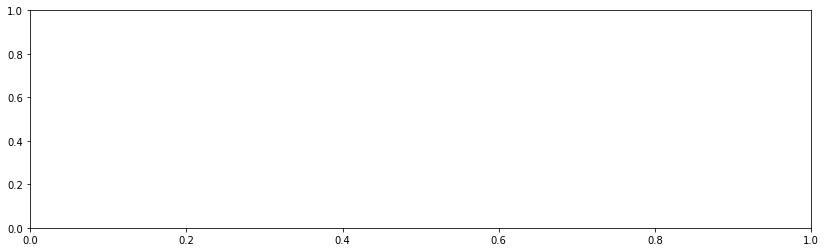

In [30]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_17),(D12,D12_17),
            (D13,D13_17),(D21,D21_17),(D22,D22_17),(D23,D23_17),
            (D31,D31_17),(D32,D32_17),(D33,D33_17)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_17),(D12,D12_17),
            (D13,D13_17),(D21,D21_17),(D22,D22_17),(D23,D23_17),
            (D31,D31_17),(D32,D32_17),(D33,D33_17)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

tval = np.linspace(0, 25, 1001)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.505
y_0c = 0.85
x_0d = 0.3
y_0d = 0.49
x_0e = 0.7
y_0e = 0.4999
x_0f = 0.51
y_0f = 0.1
initialvala = np.array([x_0a,y_0a])
initialvalb = np.array([x_0b,y_0b])
initialvalc = np.array([x_0c,y_0c])
initialvald = np.array([x_0d,y_0d])
initialvale = np.array([x_0e,y_0e])
initialvalf = np.array([x_0f,y_0f])
Loesbary1a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary1c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary1d = integrate.odeint(DGLsysbary, initialvald, tval)
gX1 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_18),(D12,D12_18),
            (D13,D13_18),(D21,D21_18),(D22,D22_18),(D23,D23_18),
            (D31,D31_18),(D32,D32_18),(D33,D33_18)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_18),(D12,D12_18),
            (D13,D13_18),(D21,D21_18),(D22,D22_18),(D23,D23_18),
            (D31,D31_18),(D32,D32_18),(D33,D33_18)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary2b = integrate.odeint(DGLsysbary, initialvalb, tval)
Loesbary2d = integrate.odeint(DGLsysbary, initialvald, tval)
gX2 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_19),(D12,D12_19),
            (D13,D13_19),(D21,D21_19),(D22,D22_19),(D23,D23_19),
            (D31,D31_19),(D32,D32_19),(D33,D33_19)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_19),(D12,D12_19),
            (D13,D13_19),(D21,D21_19),(D22,D22_19),(D23,D23_19),
            (D31,D31_19),(D32,D32_19),(D33,D33_19)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3f = integrate.odeint(DGLsysbary, initialvalf, tval)
Loesbary3c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary3e = integrate.odeint(DGLsysbary, initialvale, tval)
gX3 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

def init():
    figure1=ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
    ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax1.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax1.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure2=ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
    ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure3=ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
    ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax3.scatter(x_0f, y_0f, s=50, marker='o', c="black")
    ax3.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax3.scatter(x_0e, y_0e, s=50, marker='o', c="black")
    cbar=plt.colorbar(figure1.lines,ax=ax3, aspect=20)
    cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    return fig,

def animate(i):
    ax1.scatter(Loesbary1a[20*i, 0], Loesbary1a[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a[:20*i, 0], Loesbary1a[:20*i, 1],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1c[20*i, 0], Loesbary1c[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1c[:20*i, 0], Loesbary1c[:20*i, 1],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1d[20*i, 0], Loesbary1d[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1d[:20*i, 0], Loesbary1d[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c[20*i, 0], Loesbary2c[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c[:20*i, 0], Loesbary2c[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b[20*i, 0], Loesbary2b[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b[:20*i, 0], Loesbary2b[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d[20*i, 0], Loesbary2d[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d[:20*i, 0], Loesbary2d[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3f[20*i, 0], Loesbary3f[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3f[:20*i, 0], Loesbary3f[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3c[20*i, 0], Loesbary3c[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3c[:20*i, 0], Loesbary3c[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3e[20*i, 0], Loesbary3e[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3e[:20*i, 0], Loesbary3e[:20*i, 1],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Die auf der Homepage der Vorlesung dargestellte Animation (siehe http://itp.uni-frankfurt.de/~hanauske/VPSOC/VPSOCorona.html):

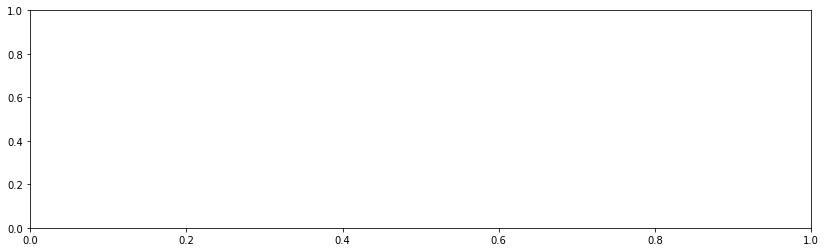

In [31]:
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter() 

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.08)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_12),(D12,D12_12),
            (D13,D13_12),(D21,D21_12),(D22,D22_12),(D23,D23_12),
            (D31,D31_12),(D32,D32_12),(D33,D33_12)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_12),(D12,D12_12),
            (D13,D13_12),(D21,D21_12),(D22,D22_12),(D23,D23_12),
            (D31,D31_12),(D32,D32_12),(D33,D33_12)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

tval = np.linspace(0, 25, 1001)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.505
y_0c = 0.85
x_0d = 0.3
y_0d = 0.49
x_0e = 0.7
y_0e = 0.4999
x_0f = 0.51
y_0f = 0.1
initialvala = np.array([x_0a,y_0a])
initialvalb = np.array([x_0b,y_0b])
initialvalc = np.array([x_0c,y_0c])
initialvald = np.array([x_0d,y_0d])
initialvale = np.array([x_0e,y_0e])
initialvalf = np.array([x_0f,y_0f])
Loesbary1b = integrate.odeint(DGLsysbary, initialvalb, tval)
Loesbary1c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary1d = integrate.odeint(DGLsysbary, initialvald, tval)
gX1 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_7),(D12,D12_7),
            (D13,D13_7),(D21,D21_7),(D22,D22_7),(D23,D23_7),
            (D31,D31_7),(D32,D32_7),(D33,D33_7)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_7),(D12,D12_7),
            (D13,D13_7),(D21,D21_7),(D22,D22_7),(D23,D23_7),
            (D31,D31_7),(D32,D32_7),(D33,D33_7)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2c = integrate.odeint(DGLsysbary, initialvalc, tval)
Loesbary2f = integrate.odeint(DGLsysbary, initialvalf, tval)
Loesbary2d = integrate.odeint(DGLsysbary, initialvald, tval)
gX2 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_1),(D12,D12_1),
            (D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),
            (D31,D31_1),(D32,D32_1),(D33,D33_1)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_1),(D12,D12_1),
            (D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),
            (D31,D31_1),(D32,D32_1),(D33,D33_1)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3a = integrate.odeint(DGLsysbary, initialvala, tval)
Loesbary3c = integrate.odeint(DGLsysbary, initialvalc, tval)
gX3 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

def init():
    figure1=ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
    ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax1.scatter(x_0b, y_0b, s=50, marker='o', c="black")
    ax1.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax1.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure2=ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
    ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    ax2.scatter(x_0f, y_0f, s=50, marker='o', c="black")
    ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
    figure3=ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
    ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
    ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
    ax3.scatter(x_0a, y_0a, s=50, marker='o', c="black")
    ax3.scatter(x_0c, y_0c, s=50, marker='o', c="black")
    cbar=plt.colorbar(figure1.lines,ax=ax3, aspect=20)
    cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=14)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax3.set_xlim(0,1)
    ax3.set_ylim(0,1)
    ax2.yaxis.set_major_formatter(nullfmt)
    ax3.yaxis.set_major_formatter(nullfmt)
    ax1.set_xlabel(r"$\rm x$")
    ax2.set_xlabel(r"$\rm x$")
    ax3.set_xlabel(r"$\rm x$")
    ax1.set_ylabel(r"$\rm y$")
#    ax1.axis('off')
#    ax2.axis('off')
#    ax3.axis('off')
    return fig,

def animate(i):
    ax1.scatter(Loesbary1b[20*i, 0], Loesbary1b[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1b[:20*i, 0], Loesbary1b[:20*i, 1],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1c[20*i, 0], Loesbary1c[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1c[:20*i, 0], Loesbary1c[:20*i, 1],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1d[20*i, 0], Loesbary1d[20*i, 1], s=10, marker='o', c="black")
    ax1.plot(Loesbary1d[:20*i, 0], Loesbary1d[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c[20*i, 0], Loesbary2c[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c[:20*i, 0], Loesbary2c[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2f[20*i, 0], Loesbary2f[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2f[:20*i, 0], Loesbary2f[:20*i, 1],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d[20*i, 0], Loesbary2d[20*i, 1], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d[:20*i, 0], Loesbary2d[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3a[20*i, 0], Loesbary3a[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3a[:20*i, 0], Loesbary3a[:20*i, 1],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3c[20*i, 0], Loesbary3c[20*i, 1], s=10, marker='o', c="black")
    ax3.plot(Loesbary3c[:20*i, 0], Loesbary3c[:20*i, 1],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=800)

plt.close(ani._fig)

HTML(ani.to_html5_video())